# Loading the libs

In [44]:
import nltk
from nltk.corpus import stopwords
import os
import numpy as np
import string
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import sklearn
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

In [26]:
%matplotlib inline

## Downloading nltk corpus

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Altha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Altha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [3]:
stopword = set(stopwords.words('english'))
punctuat = set(string.punctuation)

## Listing all files

In [4]:
pos_files = []
for root, dirs, files in os.walk("review_polarity/txt_sentoken/pos"):  
    for filename in files:
        if '.txt' in filename:
            pos_files.append(os.path.join(root, filename))
neg_files = []
for root, dirs, files in os.walk("review_polarity/txt_sentoken/neg"):  
    for filename in files:
        if '.txt' in filename:
            neg_files.append(os.path.join(root, filename))

## Reading the files

In [10]:
data = pd.DataFrame(columns=['text', 'type'])
for filename in pos_files:
    with open(filename, encoding='utf-8') as f:
        data= data.append({'text' : f.read().lower().translate(str.maketrans('','',string.punctuation)), 'type' : 'pos'}, ignore_index=True)
for filename in neg_files:
    with open(filename, encoding='utf-8') as f:
        data= data.append({'text' : f.read().lower().translate(str.maketrans('','',string.punctuation)), 'type' : 'neg'}, ignore_index=True)

In [27]:
def visualize(label):
  words = ''
  for msg in data[data['type'] == label]['text']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

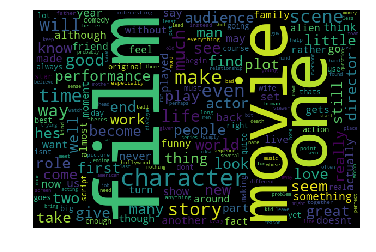

In [28]:
visualize('pos')

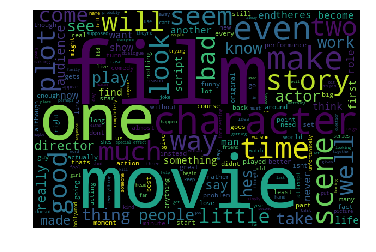

In [29]:
visualize('neg')

In [54]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['text'])
y = data['type']

In [74]:
print(X[0])
vectorizer.get_feature_names()[42188]

  (0, 8927)	1
  (0, 12594)	1
  (0, 23569)	1
  (0, 37535)	1
  (0, 45422)	1
  (0, 0)	1
  (0, 20108)	1
  (0, 3416)	1
  (0, 18472)	1
  (0, 1056)	1
  (0, 21877)	1
  (0, 3022)	1
  (0, 20660)	1
  (0, 27418)	1
  (0, 19292)	2
  (0, 29531)	1
  (0, 37705)	1
  (0, 42651)	1
  (0, 9663)	1
  (0, 41168)	1
  (0, 4431)	1
  (0, 35625)	1
  (0, 41117)	1
  (0, 17934)	1
  (0, 24569)	1
  :	:
  (0, 9788)	1
  (0, 2723)	1
  (0, 42188)	46
  (0, 6668)	1
  (0, 23002)	1
  (0, 43069)	1
  (0, 17008)	1
  (0, 29617)	3
  (0, 39451)	1
  (0, 41048)	1
  (0, 3813)	1
  (0, 41034)	1
  (0, 761)	4
  (0, 42297)	1
  (0, 46317)	1
  (0, 40826)	1
  (0, 29200)	14
  (0, 31689)	1
  (0, 18414)	3
  (0, 18940)	2
  (0, 5072)	1
  (0, 8287)	5
  (0, 16522)	8
  (0, 1079)	1
  (0, 15456)	1


'the'

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, shuffle = True)

In [52]:
model = MultinomialNB()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(classification_report(y_test, model.predict(X_test)))

0.9843283582089553
0.8075757575757576
              precision    recall  f1-score   support

         neg       0.81      0.80      0.81       330
         pos       0.80      0.82      0.81       330

   micro avg       0.81      0.81      0.81       660
   macro avg       0.81      0.81      0.81       660
weighted avg       0.81      0.81      0.81       660



In [46]:
model = svm.SVC()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(classification_report(y_test, model.predict(X_test)))

C:\Users\Altha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6895522388059702
0.693939393939394
              precision    recall  f1-score   support

         neg       0.69      0.78      0.73       356
         pos       0.70      0.59      0.64       304

   micro avg       0.69      0.69      0.69       660
   macro avg       0.69      0.69      0.69       660
weighted avg       0.69      0.69      0.69       660



In [10]:
contigency = pd.DataFrame(index=vectorizer.get_feature_names(),data = 0, columns=['pos', 'neg'])

In [97]:
for word in contigency.index:
    for i in range(0, len(sentences)):
        if word in sentences[i] and i == 1:
            contigency.loc[word]['pos'] = contigency.loc[word]['pos'] + 1
        elif word in sentences[i] and i == 0:
            contigency.loc[word]['pos'] = contigency.loc[word]['neg'] + 1

In [100]:
contigency.head(20)

,pos,neg
00,0,0
000,0,0
0009f,0,0
000acre,0,0
000aweek,0,0
000foot,0,0
000paltry,0,0
007,0,0
007esque,0,0
00s,0,0


In [114]:
count_vectorizer_pos = feature_extraction.text.CountVectorizer()
count_vectorizer_neg = feature_extraction.text.CountVectorizer()

In [115]:
X_count_pos = count_vectorizer_pos.fit_transform(sentences[0:1000])
X_count_neg = count_vectorizer_neg.fit_transform(sentences[1000:2000])

In [116]:
for word in contigency.index:
    if word in count_vectorizer_pos.vocabulary_:
        contigency.loc[word]['pos'] = count_vectorizer_pos.vocabulary_[word]
    if word in count_vectorizer_neg.vocabulary_:
        contigency.loc[word]['neg'] = count_vectorizer_neg.vocabulary_[word]

Creating a matrix of size number of review * vocabulary size

For each word, check its presence in each text

In [17]:
word_presence = pd.DataFrame(index=vectorizer.get_feature_names(),data = 0, columns=np.arange(len(sentences)))

In [18]:
word_presence.head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0009f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000acre,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000aweek,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
for i in range(0, len(sentences)):
    word_tokens = nltk.word_tokenize(sentences[i]) 
    for word in word_presence.index:
        if word in word_tokens:
            word_presence.loc[word][i] = 1

# Trying the same but with filtering the data

In [ ]:
filtered_sentence = [w for w in word_tokens if not w in stopword]
filtered_sentence = [w for w in word_tokens if not w in punctuat]

In [ ]:
filterd = []
y = []
for sentence in pos_sentences:
    word_tokens = nltk.word_tokenize(sentence) 
    filtered_sentence = [w.lower() for w in word_tokens if not w in stopword]
    filtered_sentence = [w.lower() for w in word_tokens if not w in punctuat]
    filterd.append(filtered_sentence)
    y.append(1)
for sentence in neg_sentences:
    word_tokens = nltk.word_tokenize(sentence) 
    filtered_sentence = [w.lower() for w in word_tokens if not w in stopword]
    filtered_sentence = [w.lower() for w in word_tokens if not w in punctuat]
    filterd.append(filtered_sentence)
    y.append(0)